# Data Wrangling Template

## Introduction

For this project, I will wrangle and analyse data from the WeRateDogs twitter account. I will gathered data from 3 sources which are  Enhanced Twitter Archive of this account, Image Prediction Dataset,and Tweet's JSON data containing information about retweets and favorite. After that I will generate 4 insights and some visualization accompanies to the analysis from the datasets.

## Gather

This part I will gather 3 datasets which are twitter archive, image prediction, and twitter api

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from IPython.display import Image 

%matplotlib inline

from timeit import default_timer as timer

In [2]:
#Read twitter archive csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Download the tweet image predictions tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save image predictions tsv
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
#read image predictions tsv
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Code for access twittter api- I didn't use it , just for study purpose

# import tweepy
# from tweepy import OAuthHandler
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)



In [7]:
# As I didn't use the twitter api so I will download the tweet-json.txt from Udacity instead

# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [8]:
#open the file and convert to pandas DataFrame
with open('tweet-json.txt', 'r') as file:
    tweet_json= pd.DataFrame((json.loads(line) for line in file), columns = ['id', 'favorite_count', 'retweet_count'])
    
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assess

This part I will assess dataset visually and programmatically to find the quality and tidiness issues

### Start with visual assessment

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Next, the programmatic assessment

In [12]:
#start with twitter_archive
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#check duplicated in dataset level
twitter_archive.duplicated().sum()

0

In [17]:
#check duplicated in column levels(tweet_id)

twitter_archive.tweet_id.duplicated().sum()

0

In [18]:
#check duplicated in column levels (text)

twitter_archive.text.duplicated().sum()

0

In [19]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
# Are there any more lowercase value in name?
np.sort((twitter_archive.name.unique()))[::-1]

array(['very', 'unacceptable', 'this', 'the', 'such', 'space', 'quite',
       'one', 'old', 'officially', 'not', 'my', 'mad', 'light', 'life',
       'just', 'infuriating', 'incredibly', 'his', 'getting', 'by', 'an',
       'all', 'actually', 'a', 'Zuzu', 'Zooey', 'Zoey', 'Zoe', 'Ziva',
       'Zeus', 'Zeke', 'Zeek', 'Zara', 'Yukon', 'Yogi', 'Yoda', 'Wyatt',
       'Wishes', 'Winston', 'Winnie', 'Winifred', 'Wilson', 'Willy',
       'Willow', 'Willie', 'William', 'Willem', 'Wiggles', 'Wesley',
       'Watson', 'Walter', 'Wally', 'Wallace', 'Walker', 'Waffles',
       'Wafer', 'Vixen', 'Vinscent', 'Vinnie', 'Vincent', 'Vince',
       'Venti', 'Ulysses', 'Tyrus', 'Tyrone', 'Tyr', 'Tycho', 'Tupawc',
       'Tug', 'Tuco', 'Tucker', 'Tuck', 'Trooper', 'Tripp', 'Trip',
       'Trigger', 'Trevith', 'Traviss', 'Travis', 'Tove', 'Torque',
       'Tonks', 'Tommy', 'Tom', 'Toffee', 'Todo', 'Toby', 'Tobi', 'Tito',
       'Titan', 'Tino', 'Timofy', 'Timmy', 'Timison', 'Timber', 'Tilly',
       'Ti

In [21]:
#count value of source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
#Checking the value of denominator which doesn't equal 10
(twitter_archive. rating_denominator != 10).sum()

23

In [23]:
# I wonder what does the tweet of the denominator != 10 look like
pd.options.display.max_colwidth = 150
print(twitter_archive.query('rating_denominator != 10')['text'])

313                                                        @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                  @docmisterio account started on 11/15/15
433                                                       The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...
784              RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                            Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068             After so many requests, this is Bre

From the query result above I found the denominator !=10 is a part of content creation. For example,https://twitter.com/dog_rates/status/713900603437621249 or https://twitter.com/dog_rates/status/675853064436391936. Additionally, according to https://knowyourmeme.com/memes/theyre-good-dogs-brent, I found the context of the rating system is sound more creative than calculative purpose. Thus I will leave as it is.

In [24]:
#count each dog stage and find the None value

typelist =['doggo','floofer','pupper','puppo']   

def typecount(df,list):
    num = 0
    for i in list :
        print('The number of ' + str(i)+ ': ' + str((df[str(i)].value_counts()[1])) )
        num += (df[str(i)].value_counts()[1])
    return df.shape[0] - num


typelist =['doggo','floofer','pupper','puppo']   

print('The number of dog stage missing value: ' + str(typecount(twitter_archive,typelist)))

The number of doggo: 97
The number of floofer: 10
The number of pupper: 257
The number of puppo: 30
The number of dog stage missing value: 1962


In [25]:
#check if the dog stage is fall into the correct column 
#and no other dog value appear in the different type column such as doggo in puppo

for i in typelist:
    print(twitter_archive[i].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


## twitter_archive: quality issue
 <ul>
    <li>Timestamp is an object type. It should be DateTime type</li>
    <li>Value in the source column is derived from HTML code which is hard to read </li>
     <li>Name column have an inconsistency of capitalization </li>
   <li>Name column contains some article word such as the, a, an </li>
    <li> There are missing value in columns (such as name, floofer, pupper) that use None instead of NaN
    <li> This project only want original ratings (no retweets).The repiles and retweet should be removed
    <li> There are other unnessary columns that should be dropped.
</ul>   

## twitter_archive: tidyness issue

<ul>
    <li> The dog stages (['doggo','floofer','pupper','puppo']) are now in seperated columns, It should combine in a single feature (column)
</ul>

In [26]:
# Next, programmatic assessment on image_prediction

In [27]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
#check duplicated
image_prediction.duplicated().sum()

0

In [32]:
#check duplicated in jpg_url column to see if there are duplicate image
image_prediction.jpg_url.duplicated().sum()

66

In [33]:
#the duplicate image
image_prediction[image_prediction.duplicated(subset = "jpg_url")]['jpg_url'].values

array(['https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs.

In [34]:
#recheck the missing value to confirm from the result of .info() | all should be 0
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
#check the value in p1
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [36]:
#check the value in p2
image_prediction.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [37]:
#check the value in p3
image_prediction.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

## image_prediction: quality issue
 <ul>
    <li>There are 66 duplicated image</li>
  <li>The value format of p1,p2,p3 are inconsistency of capitalization </li>
</ul>  

## image_prediction: tidyness issue

<ul>
    <li> As it is the same observation from the twitter_archive, it should be combine in the same table
</ul>

In [38]:
# Lastly, programmatic assessment on tweet_json

In [39]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [40]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [41]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [42]:
#check duplicated
tweet_json.duplicated().sum()

0

In [43]:
#check duplicated for id
tweet_json.id.duplicated().sum()

0

In [44]:
#check missing value
tweet_json.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

## tweet_json: quality issue

<ul>
    <li> The column name 'id' should change into 'tweet_id' to match with the other two datasets.
        
</ul>  

## tweet_json: tidyness issue

<ul>
    <li> It is also the same observation from the twitter_archive, it should be combine in the same table.
</ul>

### ★★★ Summary of Assessment ★★★

### Quality issues

#### twitter_archive: quality issue
 <ul>
    <li>Timestamp is an object type. It should be DateTime type</li>
    <li>Value in the source column is derived from HTML code which is hard to read </li>
     <li>Name column have an inconsistency of capitalization </li>
   <li>Name column contains some article word such as the, a, an </li>
    <li> There are missing value in columns (such as name, floofer, pupper) that use None instead of NaN
     <li> This project only want original ratings (no retweets).The repiles and retweet should be removed.   
    <li> There are unnessary columns that should be dropped.
</ul>  



#### image_prediction: quality issue
 <ul>
    <li>There are 66 duplicated images</li>
  <li>The value format of p1,p2,p3 are inconsistency of capitalization. </li>
</ul>  

#### tweet_json: quality issue
<ul>
    <li> The column name 'id' should change into 'tweet_id' to match with the other two datasets.
        
</ul>

### Tidyness issues

#### twitter_archive: tidyness issue

<ul>
    <li> The dog stages (['doggo','floofer','pupper','puppo']) are now in seperated columns, It should combine in a single feature (column)
</ul>

#### image_prediction: tidyness issue

<ul>
    <li> As it is the same observation from the twitter_archive, it should be combine in the same table.
</ul>

#### tweet_json: tidyness issue

<ul>
    <li> It is also the same observation from the twitter_archive, it should be combine in the same table.
</ul>

## Clean

In [45]:
#Create copy of DataFrames
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [46]:
#check the copied DataFrame
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [47]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
tweet_json_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Define  Quality Issue 1.1 (twitter_archive: quality issue)

Timestamp is an object type. It should be DateTime type

#### Code

In [49]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define Quality Issue 1.2 (twitter_archive: quality issue)
Value in the source column is derived from HTML code which is hard to read

#### Code

In [51]:
source_val = twitter_archive_clean.source.value_counts()
source_short_val = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

for i,v in zip(source_val.index, source_short_val):
    twitter_archive_clean.source.replace(str(i),str(v), inplace = True)

#### Test

In [52]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [53]:
twitter_archive_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### Define Quality Issue 1.3 (twitter_archive: quality issue)
Name column have an inconsistency of capitalization

#### Code

In [54]:
#### Define Quality Issue 1.4
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.capitalize()

#### Test

In [55]:
np.sort((twitter_archive_clean.name.unique()))[::-1]

array(['Zuzu', 'Zooey', 'Zoey', 'Zoe', 'Ziva', 'Zeus', 'Zeke', 'Zeek',
       'Zara', 'Yukon', 'Yogi', 'Yoda', 'Wyatt', 'Wishes', 'Winston',
       'Winnie', 'Winifred', 'Wilson', 'Willy', 'Willow', 'Willie',
       'William', 'Willem', 'Wiggles', 'Wesley', 'Watson', 'Walter',
       'Wally', 'Wallace', 'Walker', 'Waffles', 'Wafer', 'Vixen',
       'Vinscent', 'Vinnie', 'Vincent', 'Vince', 'Very', 'Venti',
       'Unacceptable', 'Ulysses', 'Tyrus', 'Tyrone', 'Tyr', 'Tycho',
       'Tupawc', 'Tug', 'Tuco', 'Tucker', 'Tuck', 'Trooper', 'Tripp',
       'Trip', 'Trigger', 'Trevith', 'Traviss', 'Travis', 'Tove',
       'Torque', 'Tonks', 'Tommy', 'Tom', 'Toffee', 'Todo', 'Toby',
       'Tobi', 'Tito', 'Titan', 'Tino', 'Timofy', 'Timmy', 'Timison',
       'Timber', 'Tilly', 'Tiger', 'Thumas', 'Thor', 'This', 'Theodore',
       'Theo', 'The', 'Tessa', 'Tess', 'Terry', 'Terrenth', 'Terrance',
       'Tedrick', 'Teddy', 'Tedders', 'Ted', 'Tebow', 'Taz', 'Tayzie',
       'Tater', 'Tassy', 'Tanne

#### Define Quality Issue 1.4 (twitter_archive: quality issue)
Name column contains some article word such as the, a, an

#### Code

In [56]:
#list of the exlcude words,article, preposition, conjunction and pronoun word) 

exclude_list =['The', 'A', 'An', 'And', 'He', 'She', 
               'It', 'you', 'We', 'They', 'His', 'Her', 'Him', 'Your', 'At', 'On', 
               'For', 'In', 'Be', 'Is', 'Am', 'Are', 'Was', 'Were', 'Of', 'To', 
               'This', 'That', 'Those', 'These']

for i in exclude_list:
    twitter_archive_clean.drop(twitter_archive_clean.loc[twitter_archive_clean['name']== i].index, inplace=True)

#### Test

In [57]:
#Visually Test
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Quite', 'Dewey',
       'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn

In [58]:
#Programmatic Test
for i in exclude_list:
    assert i not in twitter_archive_clean.name.values , 'The word ' + str(i) + ' is still in the name column'

#### Define Quality Issue 1.5 (twitter_archive: quality issue)
There are missing value in columns (such as name, floofer, pupper) that use None instead of NaN

#### Code

In [59]:
twitter_archive_clean.replace('None', np.nan, inplace = True)

#### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2284 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2284 non-null   datetime64[ns, UTC]
 4   source                      2284 non-null   object             
 5   text                        2284 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2225 non-null   object             
 10  rating_numerator            2284 non-null   int64           

#### Define Quality Issue 1.6 (twitter_archive: quality issue)
This project only want original ratings (no retweets).the repiles and retweet should be removed

#### Code

In [61]:
#remove the retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
#remove the replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]


#### Test

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2026 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2026 non-null   datetime64[ns, UTC]
 4   source                      2026 non-null   object             
 5   text                        2026 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2023 non-null   object             
 10  rating_numerator            2026 non-null   int64           

#### Define Quality Issue 1.7 (twitter_archive: quality issue)
There are unnessary columns that should be dropped. 
Drop Columns: 
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' , 'rating_numerator','rating_denominator.'

#### Code

In [63]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' , 'rating_numerator','rating_denominator'], axis=1, inplace=True)

#### Test

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2026 non-null   int64              
 1   timestamp  2026 non-null   datetime64[ns, UTC]
 2   source     2026 non-null   object             
 3   text       2026 non-null   object             
 4   name       1423 non-null   object             
 5   doggo      82 non-null     object             
 6   floofer    10 non-null     object             
 7   pupper     224 non-null    object             
 8   puppo      24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 158.3+ KB


#### Define Quality Issue 1.8 (image_prediction: quality issue)
There are 66 duplicated image

#### Code

In [65]:
image_prediction_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [66]:
image_prediction_clean.jpg_url.duplicated().sum()

0

#### Define Quality Issue 1.9  (image_prediction: quality issue)
The value format of p1,p2,p3 are inconsistency of capitalization.


#### Code

In [67]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.capitalize()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.capitalize()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.capitalize()

#### Test

In [68]:
#Visualize Checking for p1 

print(image_prediction_clean.p1.unique())


['Welsh_springer_spaniel' 'Redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'Miniature_pinscher' 'Bernese_mountain_dog'
 'Box_turtle' 'Chow' 'Shopping_cart' 'Miniature_poodle' 'Golden_retriever'
 'Gordon_setter' 'Walker_hound' 'Pug' 'Bloodhound' 'Lhasa'
 'English_setter' 'Hen' 'Desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'Three-toed_sloth' 'Ox' 'Malamute' 'Guinea_pig'
 'Soft-coated_wheaten_terrier' 'Chihuahua' 'Black-and-tan_coonhound'
 'Coho' 'Toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'Llama'
 'Chesapeake_bay_retriever' 'Curly-coated_retriever' 'Dalmatian'
 'Ibizan_hound' 'Border_collie' 'Labrador_retriever' 'Seat_belt' 'Snail'
 'Miniature_schnauzer' 'Airedale' 'Triceratops' 'Swab' 'Hay' 'Hyena'
 'Jigsaw_puzzle' 'West_highland_white_terrier' 'Toy_poodle'
 'Giant_schnauzer' 'Vizsla' 'Vacuum' 'Rottweiler' 'Siberian_husky' 'Teddy'
 'Papillon' 'Saint_bernard' 'Porcupine' 'Goose' 'Tibetan_terrier' 'Borzoi'
 'Beagle' 'Hare' 'Yorkshire_terrier' 'Pomeranian' 'Electric_fan'
 'Web_si

In [69]:
#Visualize Checking for p2

print(image_prediction_clean.p2.unique())


['Collie' 'Miniature_pinscher' 'Malinois' 'Redbone' 'Rottweiler'
 'English_springer' 'Mud_turtle' 'Tibetan_mastiff' 'Shopping_basket'
 'Komondor' 'Yorkshire_terrier' 'English_foxhound' 'Bull_mastiff'
 'German_shepherd' 'Shih-tzu' 'Newfoundland' 'Cock' 'Desk' 'Toy_terrier'
 'Toy_poodle' 'Otter' 'Chesapeake_bay_retriever' 'Siberian_husky' 'Skunk'
 'Afghan_hound' 'Bloodhound' 'Barracouta' 'Papillon' 'Cocker_spaniel'
 'Chow' 'Irish_terrier' 'Chain_saw' 'Beagle' 'Giant_schnauzer'
 'Labrador_retriever' 'Pembroke' 'Chihuahua' 'Weimaraner' 'Slug'
 'Brittany_spaniel' 'Standard_schnauzer' 'Teddy' 'Armadillo'
 'African_hunting_dog' 'Vizsla' 'Doormat' 'Pug' 'Italian_greyhound'
 'Samoyed' 'Pomeranian' 'Miniature_poodle' 'Lakeland_terrier'
 'Irish_setter' 'Swab' 'Malamute' 'Bath_towel' 'Border_collie' 'Leonberg'
 'Drake' 'French_bulldog' 'Ice_bear' 'Christmas_stocking'
 'Golden_retriever' 'Standard_poodle' 'Dhole' 'Kuvasz' 'Cardigan'
 'Silky_terrier' 'Spotlight' 'Dishwasher' 'Bighorn' 'Tow_truck'
 '

In [70]:
#Visualize Checking for p3

print(image_prediction_clean.p3.unique())


['Shetland_sheepdog' 'Rhodesian_ridgeback' 'Bloodhound'
 'Miniature_pinscher' 'Doberman' 'Greater_swiss_mountain_dog' 'Terrapin'
 'Fur_coat' 'Golden_retriever' 'Soft-coated_wheaten_terrier'
 'Labrador_retriever' 'Pekinese' 'Ibizan_hound' 'French_bulldog'
 'Malinois' 'Dandie_dinmont' 'Borzoi' 'Partridge' 'Bookcase' 'Basenji'
 'Miniature_poodle' 'Great_grey_owl' 'Groenendael' 'Eskimo_dog' 'Hamster'
 'Briard' 'Papillon' 'Flat-coated_retriever' 'Gar' 'Chihuahua' 'Shih-tzu'
 'Pomeranian' 'Dingo' 'Power_drill' 'Saluki' 'Great_pyrenees'
 'West_highland_white_terrier' 'Collie' 'Toy_poodle' 'Vizsla' 'Acorn'
 'Giant_schnauzer' 'Teddy' 'Common_iguana' 'Wig' 'Water_buffalo' 'Coyote'
 'Seat_belt' 'Kelpie' 'Space_heater' 'Brabancon_griffon' 'Standard_poodle'
 'Beagle' 'Irish_water_spaniel' 'Bluetick' 'Weimaraner'
 'Chesapeake_bay_retriever' 'Toilet_tissue' 'Black-and-tan_coonhound'
 'Kuvasz' 'Christmas_stocking' 'Badger' 'Hen' 'Staffordshire_bullterrier'
 'Yorkshire_terrier' 'Lakeland_terrier' 'Weas

In [71]:
#Programmatic testing for all p1,p2,p3

for i,v,k in zip(image_prediction_clean.p1,image_prediction_clean.p2,image_prediction_clean.p3):
    cap = i[0]
    cap2 = v[0]
    cap3 = k[0]
    assert (cap.isupper()) , 'There is a non capitalize value in p1'
    assert (cap2.isupper()) , 'There is a non capitalize value in p2'
    assert (cap3.isupper()) , 'There is a non capitalize value in p3'

#### Define Quality Issue 1.10  (tweet_json: quality issue)

The column name 'id' should change into 'tweet_id' to match with the other two datasets.


#### Code 

In [72]:
tweet_json_clean = tweet_json_clean.rename(columns={'id': 'tweet_id'}) 

#### Test

In [73]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Define Tidyness Issue 1.1 (twitter_archive: tidyness issue)
The dog stages (['doggo','floofer','pupper','puppo']) are now in seperated columns, It should combine in a single feature (column)

#### Code 

In [74]:
# create new column 'stage' and fill with NaN value
twitter_archive_clean['stage'] = np.nan

In [75]:
#plan of attack is getting all index value for each dog types 
#and then map that values in the stage column at the gathered index 

#create a list for column to merge
stage_list = ['doggo','floofer','pupper','puppo']

#define fucntion to get a value to new 'stage column'

def fill_stage_value(stage_list, df, newcolstr):
    for i in stage_list:
        idx = df.index[df[i] == i]
        assert df.shape[0]-df[i].isnull().sum() == len(idx), "The idx number and value in column doesn't match"
        for idx in idx:
            df[newcolstr].loc[idx] = i

#call function
fill_stage_value(stage_list,twitter_archive_clean,'stage')

C:\Users\Singhanart\AppData\Local\Temp\ipykernel_10596\4081259622.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newcolstr].loc[idx] = i


#### Test

In [76]:
twitter_archive_clean.stage.value_counts()

pupper     224
doggo       71
puppo       24
floofer     10
Name: stage, dtype: int64

In [77]:
#At this point the column ['doggo','floofer','pupper','puppo'] can be dropped

twitter_archive_clean.drop(columns = ['doggo','floofer','pupper','puppo'], inplace= True)


In [78]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",Franklin,NaN



#### Define Tidyness Issue 1.2
As it is the same observation from the twitter_archive, the image_predcition should be combine in the same table.

#### Code 

In [79]:
df_master = pd.merge(twitter_archive_clean,image_prediction_clean, how = 'inner' , on=['tweet_id'])

#### Test

In [80]:
df_master.head()

,tweet_id,timestamp,source,text,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define Tidyness Issue 1.3
Also the tweet_json should be combine in the same table into a single master file.

#### Code

In [81]:
df_master = pd.merge(df_master,tweet_json_clean, how = 'inner' , on=['tweet_id'])

#### Test

In [82]:
df_master.head()

,tweet_id,timestamp,source,text,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [83]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 1900
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1901 non-null   int64              
 1   timestamp       1901 non-null   datetime64[ns, UTC]
 2   source          1901 non-null   object             
 3   text            1901 non-null   object             
 4   name            1377 non-null   object             
 5   stage           296 non-null    object             
 6   jpg_url         1901 non-null   object             
 7   img_num         1901 non-null   int64              
 8   p1              1901 non-null   object             
 9   p1_conf         1901 non-null   float64            
 10  p1_dog          1901 non-null   bool               
 11  p2              1901 non-null   object             
 12  p2_conf         1901 non-null   float64            
 13  p2_dog          1901 non-null   b

## Storing Data

In [84]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing, and Visualization

Analysis 1: Most top 10 popular dog name


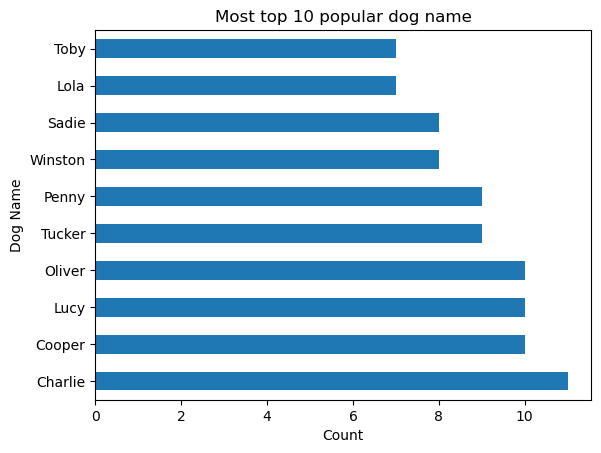

In [85]:
dogname = df_master.name.value_counts()[0:10]

dogname.plot(kind ='barh')

plt.title('Most top 10 popular dog name')
plt.xlabel('Count')
plt.ylabel('Dog Name')

fig = plt.gcf() 
fig.savefig('toptenname.png',bbox_inches='tight');


In [86]:
df_master.name.value_counts()[0:11]

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        7
Toby        7
Daisy       7
Name: name, dtype: int64

Interpretation:
From the result above, Charlie is the most popular dog name while Lucy, Oliver, Copper, Penny, Tucker, Winston, Sadie,Toby, Lola, and Daisy are listed in the top ten name.

Analysis 2: Proportion of dog stages

In [87]:
df_master.stage.value_counts()

pupper     203
doggo       62
puppo       23
floofer      8
Name: stage, dtype: int64

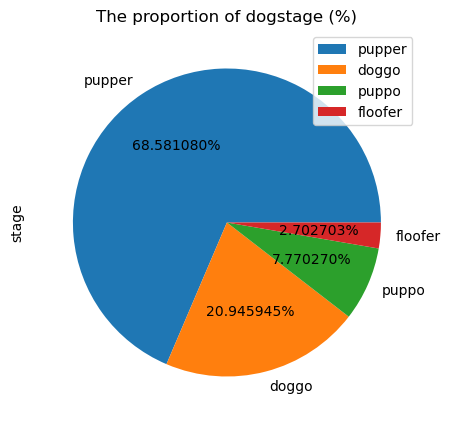

In [88]:
dogstage = df_master.stage.value_counts()
dogstage.plot(kind='pie', autopct ='%2f%%', figsize =(5,5), title = 'The proportion of dogstage (%)', legend=True)
fig = plt.gcf()
fig.savefig('proportiondogstage.png',bbox_inches='tight');

Interpretation:
From the results above, pupper dogstage have the higest proportion at 68.58% in this dataset while the doggo is the next biggest proportion which have 20.94%. The puppo and floofer are far less that the pupper with 7.77% and 2.7% respectively.

In [89]:
#print the sample image of pupper dog
Image(url = df_master.query('stage == "pupper"')['jpg_url'].sample(1, random_state= 88).values[0])

Analysis 3: Which dog stage got the most retweet

In [90]:
df_master.groupby('stage')[['retweet_count','favorite_count']].sum()

,retweet_count,favorite_count
stage,,
doggo,447415,1214793
floofer,38214,109611
pupper,492544,1496869
puppo,161623,522650


Interpretation:
From the results above, the dog stage that got the most retweet is pupper with 492,544 retweet counts while the doggo, puppo and floofer got 447,415, 161,623 and 38,214 respectively.

Analysis 4: What kind of the top five dogs that the image prediction algorithm has a high confident?

The top five dog from p1 prediction with high confident are:
Golden_retriever      76
Pembroke              45
Labrador_retriever    39
Pug                   34
Chihuahua             25
Name: p1, dtype: int64
The top dog of the p1 prediction is Golden_retriever
Let's see the 5 sample images which predicted as Golden_retriever dog


:-) 
:-) 


:-) 
:-) 


:-) 
:-) 


:-) 
:-) 


:-) 
:-) 


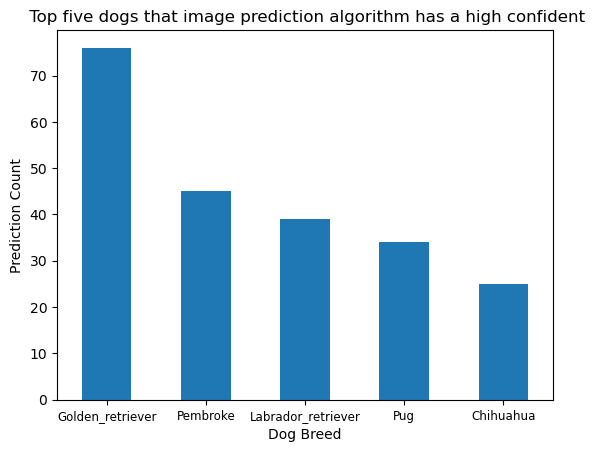

In [91]:
#Define the function to find the top five dog prediction with over 0.75 confident. 
#Then print the five sample images of the most confident breed dog of the prediction

def dog_prediction_confident (list, df):
        for i in list:
            highconfident = str(i)+'_conf'
            p_dog = str(i)+'_dog'
            
            #filter for the row(s) that the prediction is dog with confident value is equal or over 0.75
            highp =  df[((df[highconfident] >= 0.75) & (df[p_dog] == True))]
            
            #slice the result above to find the top five dog
            topfivedog = highp[i].value_counts()[:5]
            topfivedog.plot(kind = 'bar', rot = 0)
            plt.title(' Top five dogs that image prediction algorithm has a high confident')
            plt.xlabel('Dog Breed')
            plt.ylabel('Prediction Count')
            plt.xticks(fontsize=8.5)
            
            fig = plt.gcf() 
            fig.savefig('topfiveprediction.png',bbox_inches='tight');
            try:
                #Get the name of the number one top dog
                topdog = topfivedog[topfivedog == topfivedog[0]].index[0]            
            
            except IndexError:
                #If there are no any value available stop this loop and start new iteration
                print('Prediction of dog with high confident is not available for ' + str(i))
                continue
            #get five sample of image
            Sample_pic = highp[highp[i] == str(topdog)].sample(5, random_state= 88)
    
            print('The top five dog from ' + str(i) + ' prediction with high confident are:')
            print(topfivedog)
            print('The top dog of the ' + str(i) + ' prediction is '+ str(topdog) + '\nLet\'s see the 5 sample images which predicted as ' + str(topdog) + ' dog')
            
            #show the image of the sample
            for i in Sample_pic.iterrows():
                im = Image(url= str(i[1][6]))
                display(im)
                print(':-) \n:-) ')

#As the p1 got the highest confident value, the analysis on this part will take only the p1 into the function
#Call the Function

p_list = ['p1']
dog_prediction_confident(p_list,df_master)

Interpretation: The result is show that Golden Retriever is the top dog that the image prediction has a high confident with the 76 prediction counts while Pembroke, Labrador Retriever, Pug, and Chihuahua with the prediction counts or 45,39,34,25 respectively.

## Conclusion

In summary, after wrangling the 3 datasets. I've store it to the master file for analysis. The 4 insights that draw from the master file are most top 10 popular dog name, proportion of dog stages, which dog stage got the most retweet and what kind of the top five dogs that the image prediction algorithm has a high confident?